In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [83]:
df=pd.read_csv('winequality-red.csv')

In [84]:
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [86]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [87]:
df=df.astype({'quality':'float'})

In [88]:
x=df.iloc[:,0:11]
y=df['quality']

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.2,random_state=0)

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scl=StandardScaler()

In [93]:
xtr=scl.fit_transform(xtr)
xts=scl.transform(xts)

In [94]:
xtr

array([[ 0.90103398,  0.05480282,  0.9094138 , ...,  0.52091013,
        -0.22358408, -0.95579434],
       [ 1.41998736, -1.47967601,  0.9094138 , ..., -1.16841553,
        -0.68130963, -0.76727388],
       [ 0.90103398, -0.98645067,  1.4208416 , ..., -0.3237527 ,
         0.74908272,  0.17532846],
       ...,
       [-0.25219574,  0.21921126,  0.19341488, ..., -0.12883051,
         0.17692578, -0.86153411],
       [ 2.68854005, -0.32881689,  1.11398492, ..., -0.06385645,
         0.11971008,  2.15479335],
       [ 0.84337249,  2.46612668,  0.24455766, ..., -0.38872677,
        -1.0246038 , -0.95579434]])

In [95]:
ytr

642     5.0
679     5.0
473     5.0
390     8.0
1096    6.0
       ... 
763     5.0
835     5.0
1216    6.0
559     6.0
684     5.0
Name: quality, Length: 1279, dtype: float64

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
mod=LinearRegression()

In [98]:
mod.fit(xtr,ytr)

LinearRegression()

In [99]:
pred=mod.predict(xts)
print(pred)

[5.7829301  5.03619267 6.59698929 5.33912637 5.93952898 5.0072068
 5.39616171 6.05211188 4.86760343 4.95067572 5.28580441 5.41265269
 5.7057424  5.12921737 5.52885206 6.38052412 6.81012527 5.73803346
 5.97618825 5.08613415 6.34479863 5.16400983 5.64203971 6.1462903
 5.4817802  5.03391406 5.18721293 6.48783659 5.33301372 6.30458308
 6.03452293 5.82849303 5.58503524 5.28512701 5.75656128 6.15273792
 5.14134479 5.48228021 6.38983359 5.7901819  5.42936928 6.04810414
 6.70159678 6.60160183 5.97253803 4.78890763 5.49565005 6.01881894
 5.48895041 6.10824243 5.3126164  5.28492351 5.76043226 6.36081498
 5.7195388  5.26971928 5.08498332 5.31050693 6.50895816 5.44323413
 5.16377401 5.76427324 6.0703837  6.28933679 5.07315141 6.11874641
 5.35681067 6.01343647 6.12184268 5.98547673 5.35327968 5.4367731
 5.06017324 5.58939889 5.62593935 6.25651326 5.37875073 5.31024191
 5.72008022 6.30275434 5.71093253 5.27783285 5.89582077 6.0876033
 5.50616533 5.37465715 6.2437351  5.07332478 5.32665801 4.97398339

In [100]:
from sklearn.metrics import r2_score

In [101]:
score=r2_score(yts,pred)
print("R Squared Term is:",score*100)

R Squared Term is: 32.83887639580222


<AxesSubplot:xlabel='quality'>

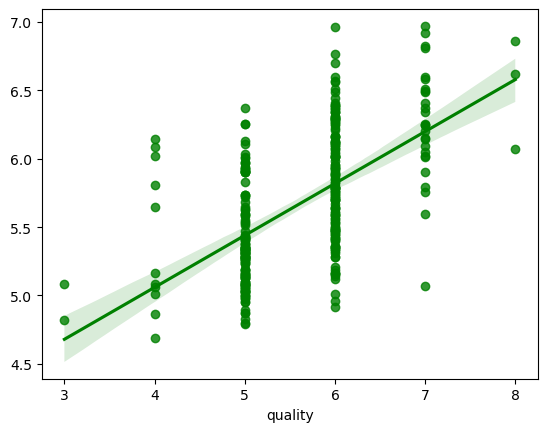

In [102]:
sns.regplot(data=df,x=yts,y=pred,color='green')